In [ ]:
# Swapnil Saha Shawon (2022533042)
# Tamanna Rahman (2021450642)
# Syeda Mashiat Tabassum (2031356642)

## **Brain Cancer Dataset**

In [ ]:
#include libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data and checking contents
data = pd.read_csv("DT-BrainCancer.csv")
print(data)

#check for null values
print("\nChecking NULL values:\n",data.isnull().sum())

    Unnamed: 0     sex   diagnosis             loc  ki    gtv  status
0            1  Female  Meningioma  Infratentorial  90   6.11       0
1            2    Male   HG glioma  Supratentorial  90  19.35       1
2            3  Female  Meningioma  Infratentorial  70   7.95       0
3            4  Female   LG glioma  Supratentorial  80   7.61       1
4            5    Male   HG glioma  Supratentorial  90   5.06       1
..         ...     ...         ...             ...  ..    ...     ...
83          84    Male   HG glioma  Supratentorial  80   0.16       1
84          85    Male   HG glioma  Supratentorial  80  19.81       1
85          86    Male  Meningioma  Supratentorial  90   2.50       0
86          87    Male  Meningioma  Supratentorial  90   2.02       0
87          88    Male       Other  Infratentorial  80   0.11       0

[88 rows x 7 columns]

Checking NULL values:
 Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
d

In [ ]:
#preprocessing data
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("\n")

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data)

Categorical Columns: ['sex', 'diagnosis', 'loc']


    Unnamed: 0  ki    gtv  status  sex_Male  diagnosis_LG glioma  \
0            1  90   6.11       0     False                False   
1            2  90  19.35       1      True                False   
2            3  70   7.95       0     False                False   
3            4  80   7.61       1     False                 True   
4            5  90   5.06       1      True                False   
..         ...  ..    ...     ...       ...                  ...   
83          84  80   0.16       1      True                False   
84          85  80  19.81       1      True                False   
85          86  90   2.50       0      True                False   
86          87  90   2.02       0      True                False   
87          88  80   0.11       0      True                False   

    diagnosis_Meningioma  diagnosis_Other  loc_Supratentorial  
0                   True            False               False  
1   

In [ ]:
#selecting target variable and features
X = data.drop(['status','Unnamed: 0'], axis = 1)
y = data['status']

#splitting data for training, validating and testing
X_train = X.iloc[:61]
X_validation = X.iloc[61:74]
X_test = X.iloc[74:]
print(X_validation)
y_train = y.iloc[:61]
y_validation = y.iloc[61:74]
y_test = y.iloc[74:]

     ki    gtv  sex_Male  diagnosis_LG glioma  diagnosis_Meningioma  \
61   80  11.51      True                False                  True   
62   40  22.87     False                False                 False   
63   80   4.77      True                False                  True   
64   80   9.58      True                 True                 False   
65  100   4.00     False                False                  True   
66   80   7.59     False                False                 False   
67   70   0.01      True                False                 False   
68   80   6.93     False                False                  True   
69   70   3.63     False                False                  True   
70   70   8.45      True                False                  True   
71   80  20.93      True                False                  True   
72   90   2.64      True                 True                 False   
73   80   0.19     False                False                 False   

    d

### **Evaluation Metrics**

In [ ]:
#Accuracy
def calc_accuracy(y_true, y_pred):
  correct = 0
  total = len(y_true)

  for true_label, predicted_label in zip(y_true, y_pred):
    if true_label == predicted_label:
      correct += 1

  accuracy = correct / total
  return accuracy

#Confusion Matrix
def confusion_matrix(y_true, y_pred):
  TN, TP, FN, FP = 0, 0, 0, 0

  for true_label, predicted_label in zip(y_true, y_pred):
    if true_label == 0 and predicted_label == 0:
      TN += 1
    elif true_label == 0 and predicted_label == 1:
      FP += 1
    elif true_label == 1 and predicted_label == 0:
      FN += 1
    elif true_label == 1 and predicted_label == 1:
      TP += 1

  return (TN, TP, FN, FP)

#Precision
def precision(y_true, y_pred):
  true_positives = 0
  false_positives = 0

  for true, pred in zip(y_true, y_pred):
    if true == 1 and pred == 1:
      true_positives += 1
    elif true == 0 and pred == 1:
      false_positives += 1

  if true_positives + false_positives == 0:
    precision = 0.0
  else:
    precision = true_positives / (true_positives + false_positives)

  return precision


#Recall
def recall(y_true, y_pred):
  true_positives = 0
  false_negatives = 0

  for true, pred in zip(y_true, y_pred):
    if true == 1 and pred == 1:
      true_positives += 1
    elif true == 1 and pred == 0:
      false_negatives += 1

  if true_positives + false_negatives == 0:
    recall = 0.0
  else:
    recall = true_positives / (true_positives + false_negatives)

  return recall

#F1-Score
def f1(precision, recall):
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  return f1_score


### **ZeroR Classifier**

In [ ]:
# Build ZeroR Classifier
from collections import Counter

class ZeroR:
    def __init__(self):
        self.majority_class = None

    def fit(self, X, y):
        # Find the majority class
        self.majority_class = Counter(y).most_common(1)[0][0]

    def predict(self, X):
        # Return the majority class for all instances
        return [self.majority_class] * len(X)


# Initialize the ZeroR model
zr = ZeroR()

# Train the model
zr.fit(X_train, y_train)


Accuracy:  0.5573770491803278
Precision:  0.0
Recall:  0.0
F1-Score:  0
Confusion Matrix:
TN: 34   FP: 0
FN: 27   TP: 0


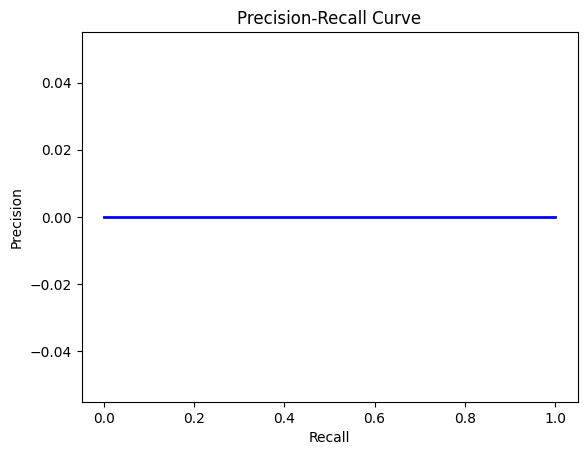

In [ ]:
# Evaluating with Training set
y_pred = zr.predict(X_train)

acc = calc_accuracy(y_train, y_pred)
print("Accuracy: ", acc)
prec = precision(y_train, y_pred)
print("Precision: ", prec)
rec = recall(y_train, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.6153846153846154
Precision:  0.0
Recall:  0.0
F1-Score:  0
Confusion Matrix:
TN: 8   FP: 0
FN: 5   TP: 0


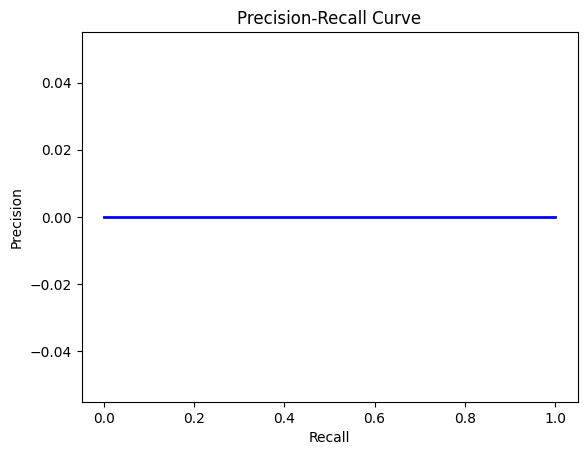

In [ ]:
# Evaluating with Validation set
y_pred = zr.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.7857142857142857
Precision:  0.0
Recall:  0.0
F1-Score:  0
Confusion Matrix:
TN: 11   FP: 0
FN: 3   TP: 0


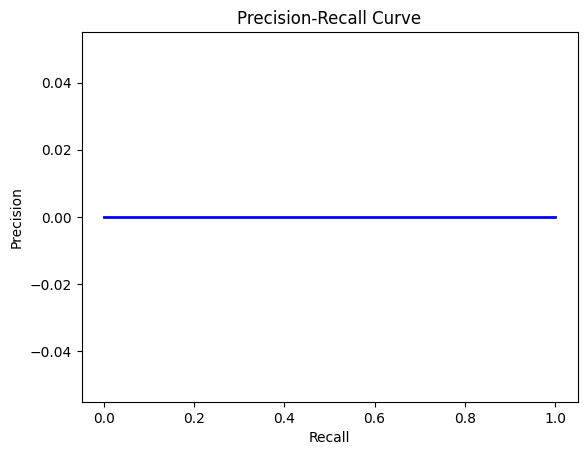

In [ ]:
# Evaluating with Testing set
y_pred = zr.predict(X_test)

acc = calc_accuracy(y_test, y_pred)
print("Accuracy: ", acc)
prec = precision(y_test, y_pred)
print("Precision: ", prec)
rec = recall(y_test, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### **OneR Classifier**

In [ ]:
from collections import defaultdict

class OneRClassifier:
    def __init__(self):
        self.best_attribute = None
        self.mapping = {}

    def fit(self, X, y):
        if len(X) != len(y):
            raise ValueError("Number of samples in X and y must be the same")

        min_error = float('inf')

        for i in range(len(X)):
            attribute_values = defaultdict(list)
            for j in range(len(X)):
                attribute_values[X[j][i]].append(y[j])

            error = sum(len(attribute_values[val]) - max(self.count_classes(attribute_values[val]).values()) for val in attribute_values)

            if error < min_error:
                min_error = error
                self.best_attribute = i
                self.mapping = {val: max(self.count_classes(attribute_values[val]), key=self.count_classes(attribute_values[val]).get) for val in attribute_values}

    def predict(self, X):
        if self.best_attribute is None:
            raise ValueError("The model has not been trained yet. Call fit() before predict()")

        predictions = []
        for sample in X:
            predictions.append(self.mapping[sample[self.best_attribute]])

        return predictions

    def count_classes(self, classes):
        counts = defaultdict(int)
        for c in classes:
            counts[c] += 1
        return counts

# Initialize the OneR model
oner_model = OneRClassifier()

#y_train_bool = [bool(val) for val in y_train]

# Train the model
oner_model.fit(X_train['sex_Male'], y_train)

# Make predictions
predictions = oner_model.predict(X_test)


IndexError: invalid index to scalar variable.

### **K-Nearest-Neighbor Classifiers**

In [ ]:
# Training the dataset
from sklearn.neighbors import KNeighborsClassifier

#Define the KNN Classifier
knn_classifier = KNeighborsClassifier()

knn = knn_classifier.fit(X_train, y_train)

Accuracy:  0.6885245901639344
Precision:  0.6666666666666666
Recall:  0.5925925925925926
F1-Score:  0.627450980392157
Confusion Matrix:
TN: 26   FP: 8
FN: 11   TP: 16


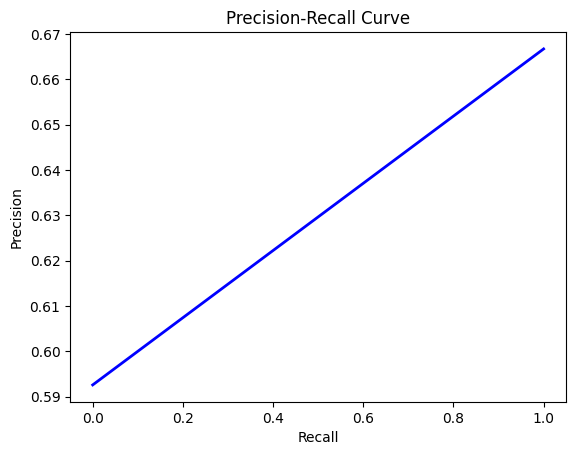

In [ ]:
#Validating the model using training set
y_pred = knn.predict(X_train)

acc = calc_accuracy(y_train, y_pred)
print("Accuracy: ", acc)
prec = precision(y_train, y_pred)
print("Precision: ", prec)
rec = recall(y_train, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.7692307692307693
Precision:  0.6666666666666666
Recall:  0.8
F1-Score:  0.7272727272727272
Confusion Matrix:
TN: 6   FP: 2
FN: 1   TP: 4


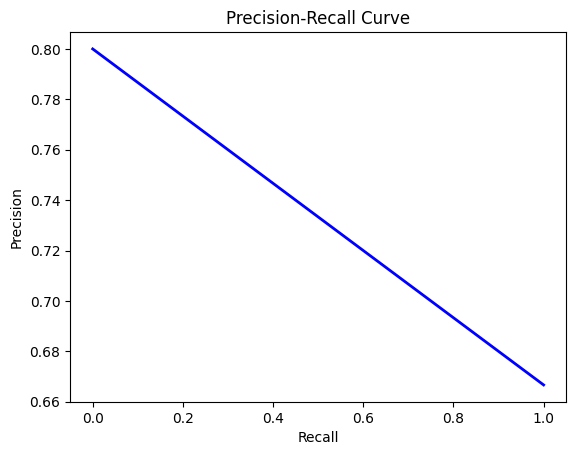

In [ ]:
#Validating the model using validation set
y_pred = knn.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#Validating
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the combined training and validation sets
X_train_new = X.iloc[:74]
y_train_new = y.iloc[:74]
grid_search.fit(X_train_new, y_train_new)

# Get the best model on the test set
best_knn_model = grid_search.best_estimator_

print(best_knn_model)

KNeighborsClassifier(metric='euclidean')


Accuracy:  0.7857142857142857
Precision:  0.5
Recall:  1.0
F1-Score:  0.6666666666666666
Confusion Matrix:
TN: 8   FP: 3
FN: 0   TP: 3


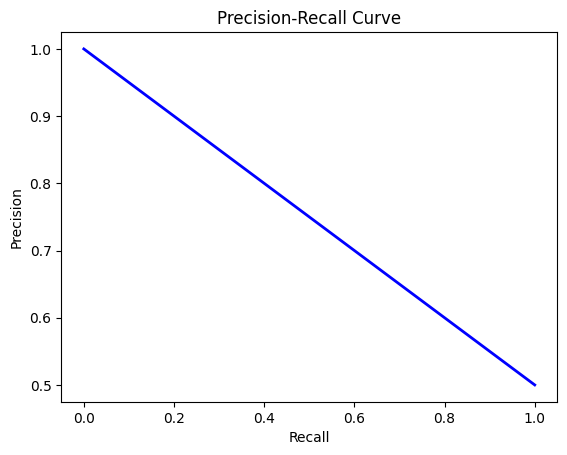

In [ ]:
#Testing best model using test set
y_pred = knn.predict(X_test)

acc = calc_accuracy(y_test, y_pred)
print("Accuracy: ", acc)
prec = precision(y_test, y_pred)
print("Precision: ", prec)
rec = recall(y_test, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### **Naive Bayesian Classifier**

In [ ]:
#Training the dataset
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb = nb_classifier.fit(X_train, y_train)

Accuracy:  0.7049180327868853
Precision:  0.7368421052631579
Recall:  0.5185185185185185
F1-Score:  0.6086956521739131
Confusion Matrix:
TN: 29   FP: 5
FN: 13   TP: 14


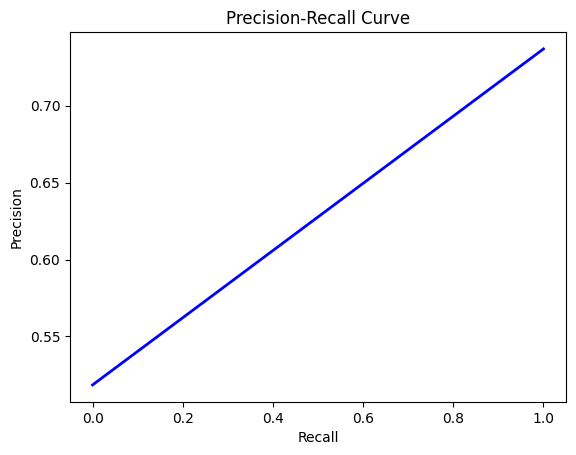

In [ ]:
#Validating the model using training set
y_pred = nb.predict(X_train)

acc = calc_accuracy(y_train, y_pred)
print("Accuracy: ", acc)
prec = precision(y_train, y_pred)
print("Precision: ", prec)
rec = recall(y_train, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.6153846153846154
Precision:  0.5
Recall:  0.4
F1-Score:  0.4444444444444445
Confusion Matrix:
TN: 6   FP: 2
FN: 3   TP: 2


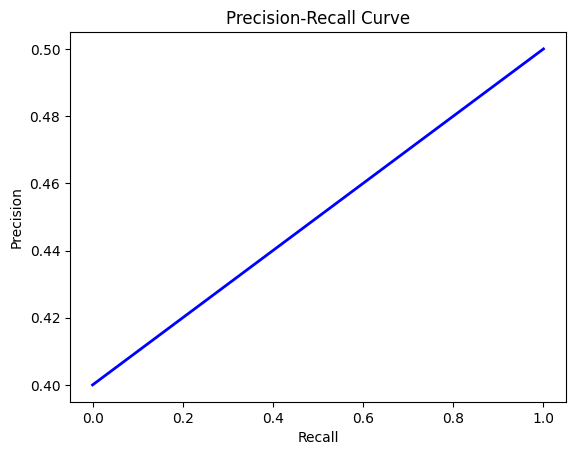

In [ ]:
#Validating the model using validation set
y_pred = nb.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.7857142857142857
Precision:  0.5
Recall:  1.0
F1-Score:  0.6666666666666666
Confusion Matrix:
TN: 8   FP: 3
FN: 0   TP: 3


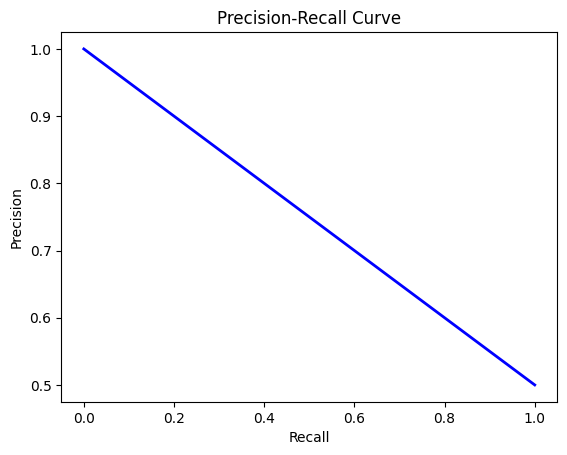

In [ ]:
#Testing best model using test set
y_pred = nb.predict(X_test)

acc = calc_accuracy(y_test, y_pred)
print("Accuracy: ", acc)
prec = precision(y_test, y_pred)
print("Precision: ", prec)
rec = recall(y_test, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### **Support vector machine (SVM)**

In [ ]:
# Training the dataset
from sklearn.svm import SVC

#Define the SVC Classifier
svm_classifier = SVC()

svm = svm_classifier.fit(X_train, y_train)

Accuracy:  0.6065573770491803
Precision:  1.0
Recall:  0.1111111111111111
F1-Score:  0.19999999999999998
Confusion Matrix:
TN: 34   FP: 0
FN: 24   TP: 3


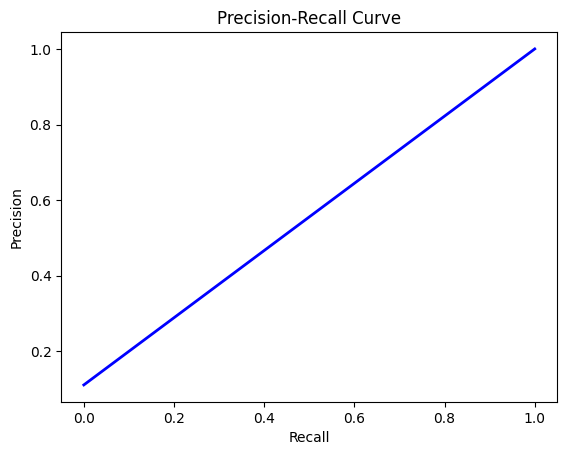

In [ ]:
#Validating the model using training set
y_pred = svm.predict(X_train)

acc = calc_accuracy(y_train, y_pred)
print("Accuracy: ", acc)
prec = precision(y_train, y_pred)
print("Precision: ", prec)
rec = recall(y_train, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.6923076923076923
Precision:  1.0
Recall:  0.2
F1-Score:  0.33333333333333337
Confusion Matrix:
TN: 8   FP: 0
FN: 4   TP: 1


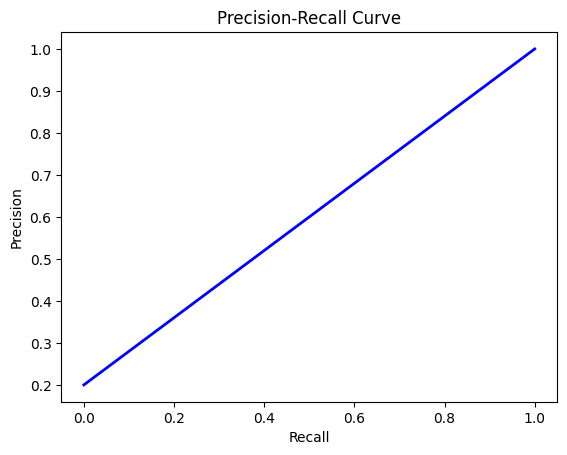

In [ ]:
#Validating the model using validation set
y_pred = svm.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy:  0.7857142857142857
Precision:  0.0
Recall:  0.0
F1-Score:  0
Confusion Matrix:
TN: 11   FP: 0
FN: 3   TP: 0


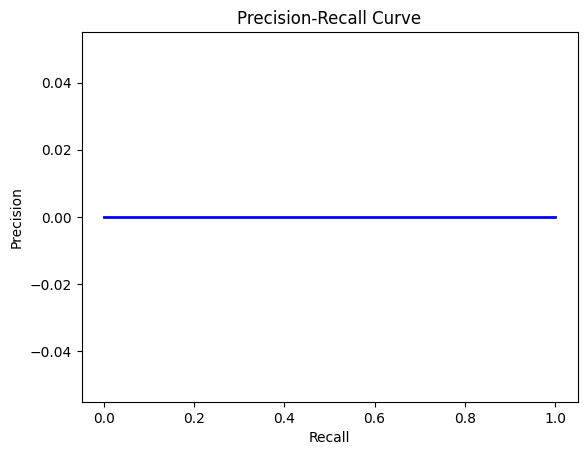

In [ ]:
#Testing best model using test set
y_pred = svm.predict(X_test)

acc = calc_accuracy(y_test, y_pred)
print("Accuracy: ", acc)
prec = precision(y_test, y_pred)
print("Precision: ", prec)
rec = recall(y_test, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

plt.plot((rec, prec), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()